# Midterm - David Abramowitz Nov. 16, 2018


## Abstract
This project examined what, if any, correlations exist within the annual harvests of various fish using the new tools that we learned recently in class.

## Dataset Preparation
The dataset has 117 rows and 12 columns. It covers 1974-2012, with three rows per year. These rows are for the three categories of fishing: treaty, non-treaty, and sport. The types of fish included in the data are: chinook, coho, chum, pink, sockeye, steelhead, and jacks. Jacks were not included in calculation and analysis as they are a subset of steelhead that are only fished for sport purposes. Becuase they are only fished for sport purposes, inlcluding them in calculations as steelhead would deceptively skew the data. The other columns were the unknown category, total by year, and total by fisher type (fisher type being one of the three categories mentioned above). The unknown column was not used as there was little that could be done with it, and the other two were not used as they either contained null values or included jacks data.
The data can be found here: https://catalog.data.gov/dataset/washington-anadromous-fish-harvest-data-1974-2012-f94d5

Importing the data and reading the first few lines of it:

In [61]:
#import modules
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
#import data as dataframe and print first few rows
df = pd.read_csv("WA_Fish.csv")
df.head()

,Year,Fisher Type,CHINOOK,COHO,CHUM,PINK,SOCKEYE,STEELHEAD,JACKS,UNKNOWN,Total by Fisher Type,Total by Year
0,1974,Sport,491034.0,790981.0,4311.0,159.0,8863.0,116829.0,25072.0,NaN,1437249.0,NaN
1,1974,Non-Treaty,464073.0,1619193.0,289429.0,1170.0,2452416.0,927.0,NaN,NaN,4827208.0,NaN
2,1974,Treaty,142707.0,479473.0,173059.0,25.0,59857.0,4885.0,NaN,NaN,860006.0,7124463.0
3,1975,Sport,616975.0,701721.0,771.0,21284.0,639.0,67932.0,57497.0,488.0,1467307.0,NaN
4,1975,Non-Treaty,443682.0,1368932.0,135052.0,1301226.0,1558893.0,NaN,NaN,NaN,4807785.0,NaN


I isolated the jacks column by making a new dataframe and dropping every other row from the data. This method was highly inefficient, but effective overall. This also allows for further analysis to be done on these specific columns in the future. 

In [63]:
#Drop 'JACKS' and 'UNKNOWN' and isolate them as seperate dataframes
#df=df.drop("JACKS", 1)

df.jacks=df.drop("CHINOOK", 1)
df.jacks=df.jacks.drop("CHUM", 1)
df.jacks=df.jacks.drop("PINK", 1)
df.jacks=df.jacks.drop("SOCKEYE", 1)
df.jacks=df.jacks.drop("STEELHEAD", 1)
df.jacks=df.jacks.drop("UNKNOWN", 1)
df.jacks=df.jacks.drop("COHO", 1)
df.jacks=df.jacks.drop("Total by Fisher Type", 1)
df.jacks=df.jacks.drop("Total by Year", 1)


             
#print(df.jacks)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


Below, the unknown column is isolated as its own dataframe.

In [64]:
#Isolate 'UNKNOWN' column

df.unknown=df.drop("CHINOOK", 1)
df.unknown=df.unknown.drop("CHUM", 1)
df.unknown=df.unknown.drop("PINK", 1)
df.unknown=df.unknown.drop("SOCKEYE", 1)
df.unknown=df.unknown.drop("STEELHEAD", 1)
df.unknown=df.unknown.drop("JACKS", 1)
df.unknown=df.unknown.drop("COHO", 1)
df.unknown=df.unknown.drop("Total by Fisher Type", 1)
df.unknown=df.unknown.drop("Total by Year", 1)

#print(df.unknown)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
#Isolate Chinook
df.chinook=df.drop("STEELHEAD", 1)
df.chinook=df.chinook.drop("CHUM", 1)
df.chinook=df.chinook.drop("PINK", 1)
df.chinook=df.chinook.drop("SOCKEYE", 1)
df.chinook=df.chinook.drop("UNKNOWN", 1)
df.chinook=df.chinook.drop("JACKS", 1)
df.chinook=df.chinook.drop("COHO", 1)
df.chinook=df.chinook.drop("Total by Fisher Type", 1)
df.chinook=df.chinook.drop("Total by Year", 1)

df.chinook=df.chinook.drop("Year", 1)
df.chinook=df.chinook.drop("Fisher Type", 1)

#print(df.chinook)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Now, steelhead is isolated.

In [66]:
#Isolate Steelhead
df.steelhead=df.drop("CHINOOK", 1)
df.steelhead=df.steelhead.drop("CHUM", 1)
df.steelhead=df.steelhead.drop("PINK", 1)
df.steelhead=df.steelhead.drop("SOCKEYE", 1)
df.steelhead=df.steelhead.drop("UNKNOWN", 1)
df.steelhead=df.steelhead.drop("JACKS", 1)
df.steelhead=df.steelhead.drop("COHO", 1)
df.steelhead=df.steelhead.drop("Total by Fisher Type", 1)
df.steelhead=df.steelhead.drop("Total by Year", 1)

df.steelhead=df.steelhead.drop("Year", 1)
df.steelhead=df.steelhead.drop("Fisher Type", 1)

#print(df.steelhead)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Pink is isolated.

In [67]:
#Isolate Pink
df.pink=df.drop("CHINOOK", 1)
df.pink=df.pink.drop("CHUM", 1)
df.pink=df.pink.drop("STEELHEAD", 1)
df.pink=df.pink.drop("SOCKEYE", 1)
df.pink=df.pink.drop("UNKNOWN", 1)
df.pink=df.pink.drop("JACKS", 1)
df.pink=df.pink.drop("COHO", 1)
df.pink=df.pink.drop("Total by Fisher Type", 1)
df.pink=df.pink.drop("Total by Year", 1)

df.pink=df.pink.drop("Year", 1)
df.pink=df.pink.drop("Fisher Type", 1)



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


Coho, chum, and sockeye are isolated. Note that these are being added as new dataframes, the original data is still intact.

In [68]:
#Isolate coho
df.coho=df.drop("CHINOOK", 1)
df.coho=df.coho.drop("CHUM", 1)
df.coho=df.coho.drop("PINK", 1)
df.coho=df.coho.drop("SOCKEYE", 1)
df.coho=df.coho.drop("UNKNOWN", 1)
df.coho=df.coho.drop("JACKS", 1)
df.coho=df.coho.drop("STEELHEAD", 1)
df.coho=df.coho.drop("Total by Fisher Type", 1)
df.coho=df.coho.drop("Total by Year", 1)

df.coho=df.coho.drop("Year", 1)
df.coho=df.coho.drop("Fisher Type", 1)



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [69]:
#Isolate sockeye
df.sockeye=df.drop("CHINOOK", 1)
df.sockeye=df.sockeye.drop("CHUM", 1)
df.sockeye=df.sockeye.drop("PINK", 1)
df.sockeye=df.sockeye.drop("STEELHEAD", 1)
df.sockeye=df.sockeye.drop("UNKNOWN", 1)
df.sockeye=df.sockeye.drop("JACKS", 1)
df.sockeye=df.sockeye.drop("COHO", 1)
df.sockeye=df.sockeye.drop("Total by Fisher Type", 1)
df.sockeye=df.sockeye.drop("Total by Year", 1)

df.sockeye=df.sockeye.drop("Year", 1)
df.sockeye=df.sockeye.drop("Fisher Type", 1)



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [70]:
#Isolate chum
df.chum=df.drop("CHINOOK", 1)
df.chum=df.chum.drop("STEELHEAD", 1)
df.chum=df.chum.drop("PINK", 1)
df.chum=df.chum.drop("SOCKEYE", 1)
df.chum=df.chum.drop("UNKNOWN", 1)
df.chum=df.chum.drop("JACKS", 1)
df.chum=df.chum.drop("COHO", 1)
df.chum=df.chum.drop("Total by Fisher Type", 1)
df.chum=df.chum.drop("Total by Year", 1)

df.chum=df.chum.drop("Year", 1)
df.chum=df.chum.drop("Fisher Type", 1)



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


## Data Modeling 

Since the goal was to find and analize any extraordinary correlations, the primary modeling that was done was linear regression. 

In [71]:
#An attempt at finding correlation
#http://benalexkeen.com/correlation-in-python/
np.corrcoef(df.steelhead, df.chinook)

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

Looking at steelhead versus chinook. There is no observable trend or correlation between the two.

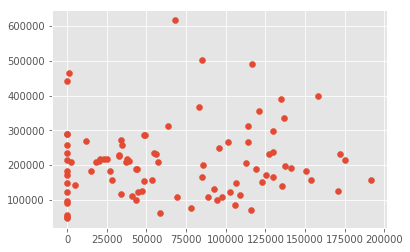

In [72]:
#Plotting the two sets of data
#No discernable correlation
#http://benalexkeen.com/correlation-in-python/
%matplotlib inline
mpl.style.use('ggplot')

plt.scatter(df.steelhead, df.chinook)
plt.show()

Below is steelhead versus chum. While there was a stronger correlation than before, the consistent trend that was expected was not present.

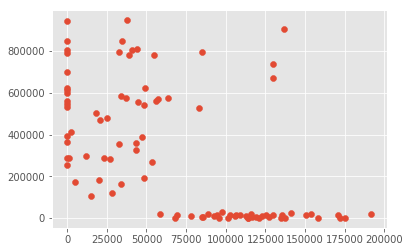

In [73]:
#Plotting the two sets of data
#No discernable correlation
#http://benalexkeen.com/correlation-in-python/
%matplotlib inline
mpl.style.use('ggplot')

plt.scatter(df.steelhead, df.chum)
plt.show()

In [74]:
#An attempt at finding correlation
#http://benalexkeen.com/correlation-in-python/
np.corrcoef(df.steelhead, df.chum)

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

Below shows sockeye versus pink. Again, there was not the clearly evident trend that I expected. 

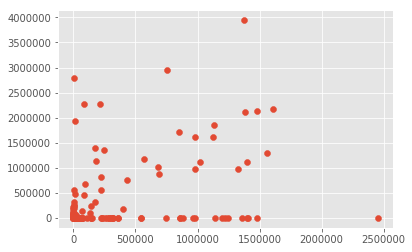

In [89]:
%matplotlib inline
mpl.style.use('ggplot')

plt.scatter(df.sockeye, df.pink)
plt.show()

Coho and chum. This was probably one of the more random distributions that was observed. 

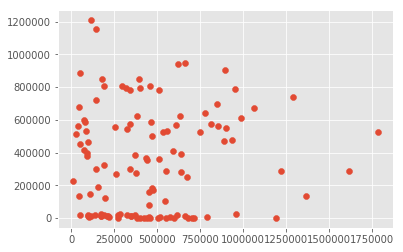

In [87]:
%matplotlib inline
mpl.style.use('ggplot')

plt.scatter(df.coho, df.chum)
plt.show()

Coho versus pink:

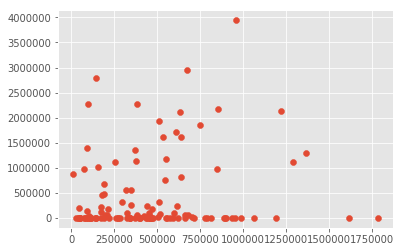

In [88]:
%matplotlib inline
mpl.style.use('ggplot')

plt.scatter(df.coho, df.pink)
plt.show()

Below are three attempts are seeing the correlation coefficients. I was not able to use these tool effectively, however. The attempts remain remain here in the possibility that soemone with more advanced skills will be able to usefully interpret these figures.

In [83]:
from scipy.stats.stats import pearsonr  
a=pearsonr(df.chum,df.coho)
print (a)

(array([nan]), array([1.]))


In [82]:
import numpy
print(numpy.corrcoef(df.chum,df.coho))


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


In [81]:
df.coho.corrwith(df.chum)

CHUM   NaN
COHO   NaN
dtype: float64

## Data Analysis and Conclusion

Below is a graph of total harvest of fish species by fishing type. Sport fishing is, not surprisingly, lower in terms of volume comapred to the other two categories. One area for further exploration here is the abnormally high volume of coho sport fishing compared to other species. Note again that jacks has been removed. Another two areas for further exploration are the nonexistance of steelhead non-treaty fishing and why steelhead is the only species that has a greaty sport fishing component that treaty or non-treaty.  

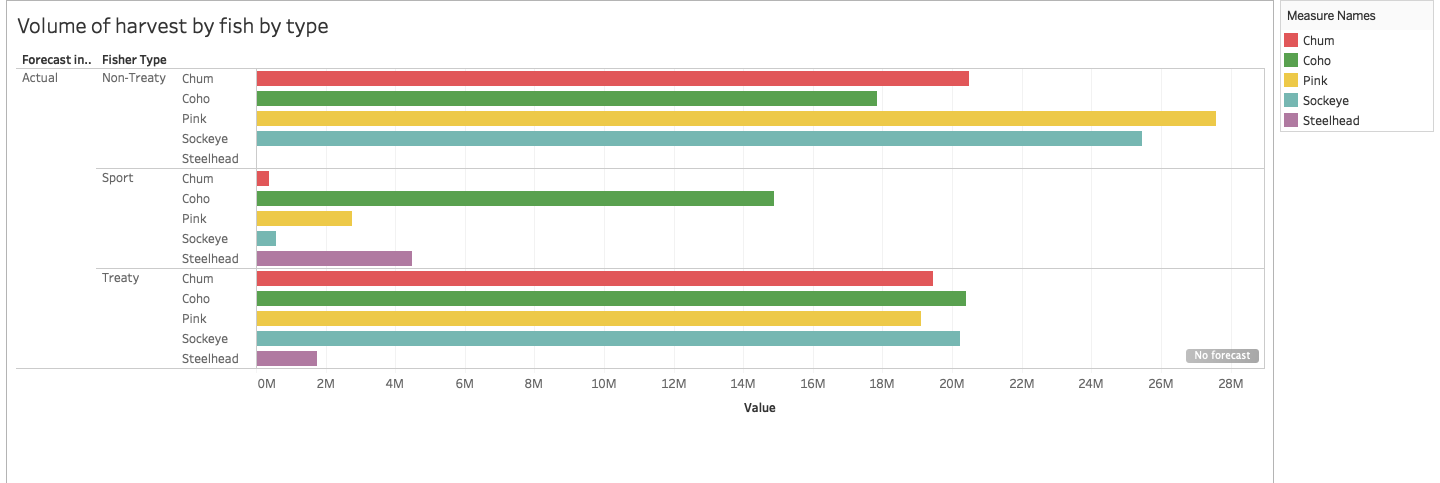

In [84]:
from IPython.display import Image
FishCounts2 = Image(filename="Fish Counts #2 (by species by type) WA 1974-2012 (NO JACKS).png", width=800, height=800)
FishCounts2

Below is a graph of total (all three types of fishing) harvest by species by year. The strongest correlations are among coho and chinook (0.83 and 0.75). None of the others were above 0.6. Even with these moderatly strong correlations, none of the graphs showed the sort of trends that were expected. Most of the graphs showed decreasing harvests in recent years. However, the rates of this decrease were wildly different and the scales for each species was quite inconsistent. Most of the graphs showed a net decrease in harvest, but again though, due to the inconsistency within each species it is unclear if these losses are to stay. In the examples of pink, sockeye, and steelhead to a degree, sudden gains have eliminated years of losses. There seems to have been a general downturn in fishing from about 2000 to 2008, but at the same time, the harvest of chum was at a record high during this period and the chinook harvest arguably did not participate in this downturn.  

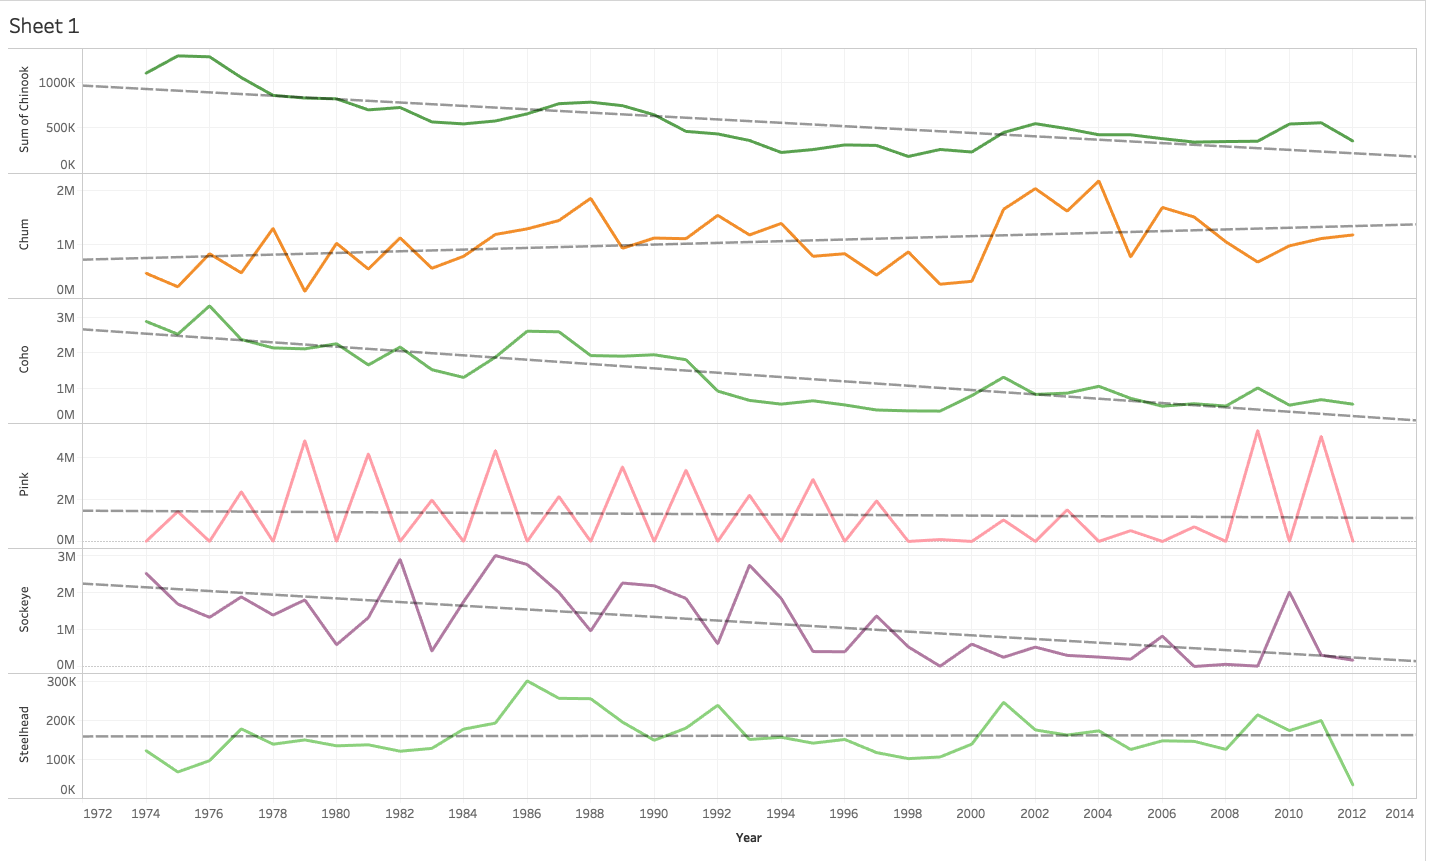

In [85]:
from IPython.display import Image
FishCounts3 = Image(filename="Fish by species.png", width=800, height=800)
FishCounts3

Some areas for further exploration:
- Differences in treaty and non-treaty fishing that would lead to a discrepancy between the two
- Other factors, such as the economy and the climate, that would lead to sizable decreases and increases over a short period of time
- Differences among the species that would play into why volumes for one species may be far greater than another
- Why volumes for previous years play a greater role in the current harvest from some species but not others


Overall, I would say that this was a negative result.

## Aknowledgements
I got the code to display images from Tableau from Julia Bietel. The code that was supposed to display correlation coefficients came from Ben Keen who posted it to this site: http://benalexkeen.com/correlation-in-python/. The same information can be found on Stack Overflow from the user Hooked (https://stackoverflow.com/questions/19428029/how-to-get-correlation-of-two-vectors-in-python). The third attempt came from Stack Overflow user Alexander (https://stackoverflow.com/questions/33157528/correlation-between-two-dataframes). Thanks goes out to the Washington Dept. of Fish and Wildlife (DFW) and data.gov for collecting and publishing the data. Also, a thank you to Brodie Cox at the DFW for maintaining the data. All code not mentioned above came from Ms. Sconyers. 